In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# ---- Step 1: Load data ----
with open ("/kaggle/input/fbi-crime/FBI_CrimeData_2016.json") as f:
    crimeList = json.load(f)

In [5]:
# ---- Step 2: Define accumulation functions ----

def accum_crime(key, crime, data):
    """Accumulate a single crime type (e.g., 'Murder') by key ('Region' or 'State')"""
    result = {}
    for record in data:
        k = record[key]
        val = int(record[crime] or 0)
        result[k] = result.get(k, 0) + val
    return result

def accum_violent_crime(key, data):
    """Accumulate total violent crimes (Murder, Rape, Robbery, Assault) by key"""
    result = {}
    for record in data:
        k = record[key]
        violent_total = sum(int(record[c] or 0) for c in ["Murder", "Rape", "Robbery", "Assault"])
        result[k] = result.get(k, 0) + violent_total
    return result

def accum_nonviolent_crime(key, data):
    """Accumulate total non-violent crimes (Burglary, Theft, Vehicle_Theft) by key"""
    result = {}
    for record in data:
        k = record[key]
        nonviolent_total = sum(int(record[c] or 0) for c in ["Burglary", "Theft", "Vehicle_Theft"])
        result[k] = result.get(k, 0) + nonviolent_total
    return result


In [6]:
# ---- Step 3: Create dictionaries ----
murder_by_region = accum_crime("Region", "Murder", crimeList)
violent_by_region = accum_violent_crime("Region", crimeList)
nonviolent_by_region = accum_nonviolent_crime("Region", crimeList)

In [7]:
# ---- Step 4: Print dictionaries ----
Region = pd.DataFrame({
    "Region": murder_by_region.keys(),
    "Murders": murder_by_region.values(),
    "Violent Crimes": violent_by_region.values(),
    "Nonviolent Crimes": nonviolent_by_region.values()
})

Region

,Region,Murders,Violent Crimes,Nonviolent Crimes
0,South,5018,331011,2080097
1,West,2605,259401,1781665
2,Northeast,1674,156891,760200
3,Midwest,3304,211854,1226462


In [17]:
# ---- Step 5: Helper function to plot bar chart ----
def plot_crime_dict(crime_dict, title):
    keys = list(crime_dict.keys())
    values = list(crime_dict.values())
    plt.figure(figsize=(8,5))
    plt.bar(keys, values, color="skyblue")
    plt.title(title)
    plt.ylabel("Number of Crimes")
    plt.xticks(rotation=0)
    plt.show()


def plot_crime_dict(crime_dicts, titles):
    regions = list(crime_dicts[0].keys())
    colors = plt.cm.tab10(np.linspace(0, 1, len(regions)))
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  

    for ax, crime_dict, title in zip(axes, crime_dicts, titles):
        keys = list(crime_dict.keys())
        values = list(crime_dict.values())
        color_map = [colors[regions.index(k)] for k in keys]
        ax.bar(keys, values, color=color_map)
        ax.set_title(title, fontsize=11)
        ax.set_ylabel("Number of Crimes")
        ax.set_xticklabels(keys, rotation=45, ha='right', fontsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_39/1847431748.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right', fontsize=9)


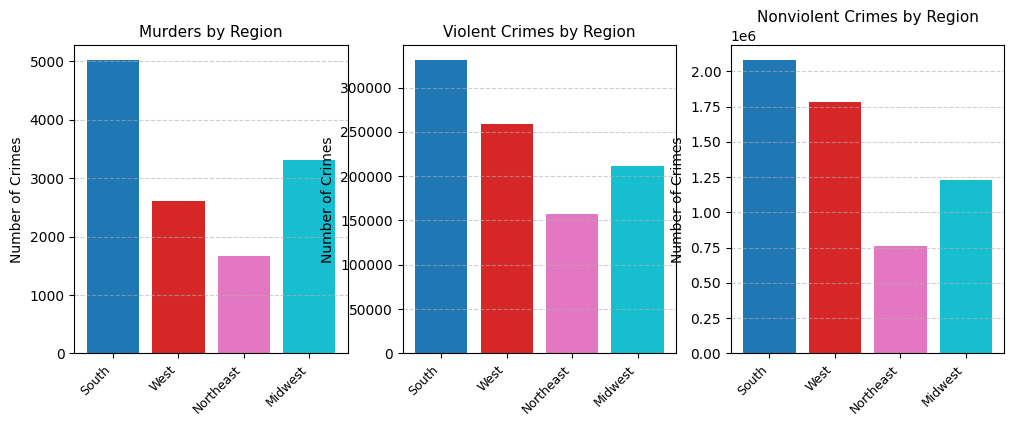

In [22]:
# ---- Step 6: Plot charts ----
plot_crime_dict(
    [murder_by_region, violent_by_region, nonviolent_by_region],
    ["Murders by Region", "Violent Crimes by Region", "Nonviolent Crimes by Region"]
)

plt.savefig('plot1.png')

In [19]:
# ---- Step 3: Create dictionaries ----
murder_by_state = accum_crime("State", "Murder", crimeList)
violent_by_state = accum_violent_crime("State", crimeList)
nonviolent_by_state = accum_nonviolent_crime("State", crimeList)

In [20]:
# ---- Step 7: Violent crimes by State and distance from national mean ----
violent_by_state = accum_violent_crime("State", crimeList)

In [21]:
# Convert to DataFrame for easier tabular printing
df_state = pd.DataFrame(list(violent_by_state.items()), columns=["State", "Violent_Total"])
national_mean = df_state["Violent_Total"].mean()
df_state["Distance_from_National_Mean"] = df_state["Violent_Total"] - national_mean
df_state.sort_values(by="Violent_Total", ascending=False)

,State,Violent_Total,Distance_from_National_Mean
4,CALIFORNIA,145205,126398.0
43,TEXAS,97872,79065.0
32,NEW YORK,66581,47774.0
13,ILLINOIS,50968,32161.0
9,FLORIDA,50540,31733.0
22,MICHIGAN,35790,16983.0
42,TENNESSEE,33433,14626.0
38,PENNSYLVANIA,32877,14070.0
35,OHIO,28235,9428.0
25,MISSOURI,25175,6368.0
